## Import Package

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
from tensorflow.keras import layers

## Dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download dedeikhsandwisaputra/rice-leafs-disease-dataset

 95% 281M/294M [00:04<00:00, 39.5MB/s]
100% 294M/294M [00:04<00:00, 67.6MB/s]


In [ ]:
! unzip rice-leafs-disease-dataset.zip

Archive:  rice-leafs-disease-dataset.zip
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (1).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (10).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (100).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (101).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (102).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (103).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (104).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (105).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (106).JPG  
  inflating: RiceLeafsDisease/train/bacterial_leaf_blight/bacterial_leaf_blight (107).JPG  
  inflating: RiceLeafsDisease/train/bacter

In [ ]:
train_dir = '/content/RiceLeafsDisease/train'
test_dir = '/content/RiceLeafsDisease/validation'

In [ ]:
dir_blb = os.path.join(train_dir, 'bacterial_leaf_blight')
dir_bs = os.path.join(train_dir, 'brown_spot')
dir_healthy = os.path.join(train_dir, 'healthy')
dir_lb = os.path.join(train_dir, 'leaf_blast')
dir_ls = os.path.join(train_dir, 'leaf_scald')
dir_nbs = os.path.join(train_dir, 'narrow_brown_spot')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(dir_blb))} images of bacterial_leaf_blight.")
print(f"There are {len(os.listdir(dir_bs))} images of Brown spot.")
print(f"There are {len(os.listdir(dir_healthy))} images of Healthy.")
print(f"There are {len(os.listdir(dir_lb))} images of Leaf blast.")
print(f"There are {len(os.listdir(dir_ls))} images of Leaf scald.")
print(f"There are {len(os.listdir(dir_nbs))} images of Narrow brown spot.")

There are 350 images of bacterial_leaf_blight.
There are 350 images of Brown spot.
There are 350 images of Healthy.
There are 350 images of Leaf blast.
There are 350 images of Leaf scald.
There are 350 images of Narrow brown spot.


In [ ]:
blb_files = os.listdir(dir_blb)
print(blb_files[:10])

bs_files = os.listdir(dir_bs)
print(bs_files[:10])

healthy_files = os.listdir(dir_healthy)
print(healthy_files[:10])

lb_files = os.listdir(dir_lb)
print(lb_files[:10])

ls_files = os.listdir(dir_ls)
print(ls_files[:10])

nbs_files = os.listdir(dir_nbs)
print(nbs_files[:10])

['bacterial_leaf_blight (120).JPG', 'bacterial_leaf_blight (236).JPG', 'bacterial_leaf_blight (175).JPG', 'bacterial_leaf_blight (339).JPG', 'bacterial_leaf_blight (20).JPG', 'bacterial_leaf_blight (228).JPG', 'bacterial_leaf_blight (145).JPG', 'bacterial_leaf_blight (124).jpg', 'bacterial_leaf_blight (167).jpg', 'bacterial_leaf_blight (43).JPG']
['brown_spot (261).jpg', 'brown_spot (159).jpg', 'brown_spot (279).jpg', 'brown_spot (268).jpg', 'brown_spot (48).jpg', 'brown_spot (249).jpg', 'brown_spot (51).jpg', 'brown_spot (131).jpg', 'brown_spot (342).JPG', 'brown_spot (145).jpg']
['healthy (204).jpg', 'healthy (19).jpg', 'healthy (89).jpg', 'healthy (31).jpg', 'healthy (329).jpg', 'healthy (129).jpg', 'healthy (266).jpg', 'healthy (270).jpg', 'healthy (267).jpg', 'healthy (300).jpg']
['leaf_blast (201).jpg', 'leaf_blast (16).jpg', 'leaf_blast (243).jpg', 'leaf_blast (294).jpg', 'leaf_blast (21).jpg', 'leaf_blast (76).jpg', 'leaf_blast (145).jpg', 'leaf_blast (180).jpg', 'leaf_blast (1

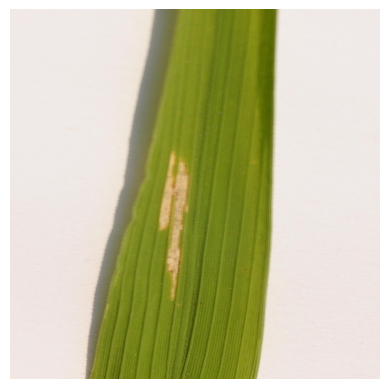

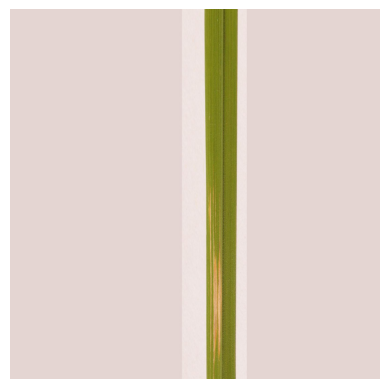

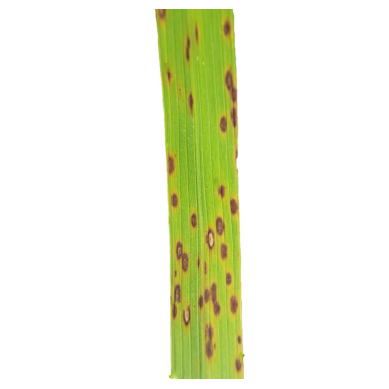

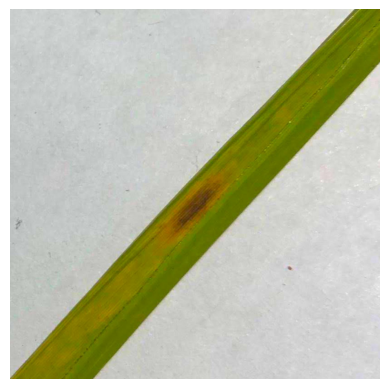

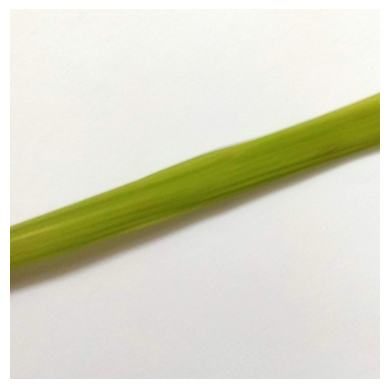

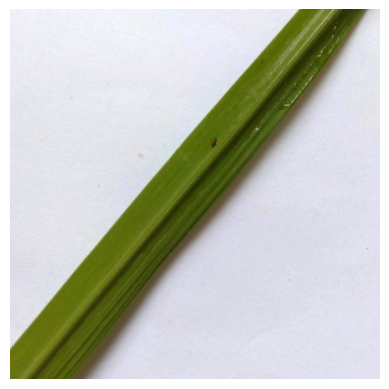

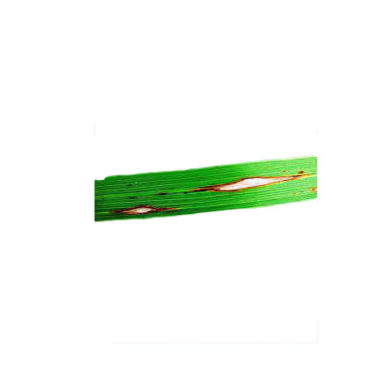

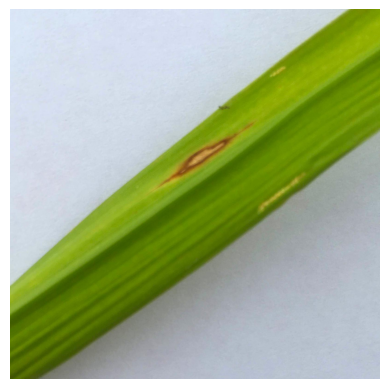

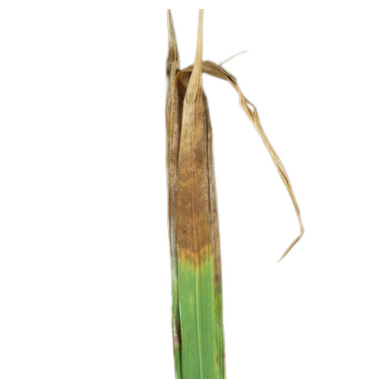

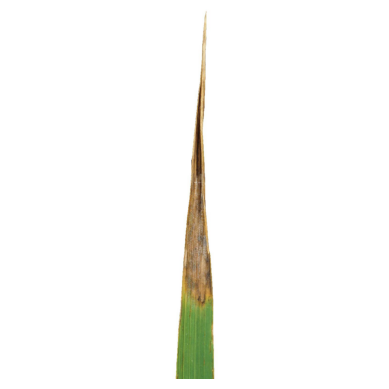

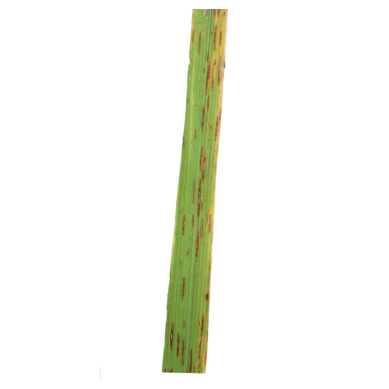

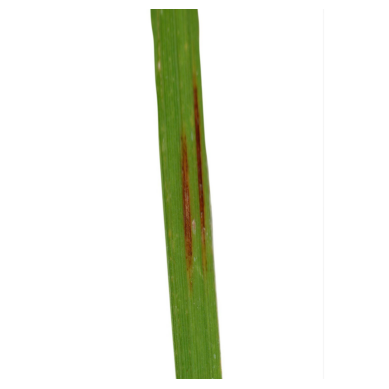

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_bacterial_leaf_blight = [os.path.join(dir_blb, fname) 
                for fname in blb_files[pic_index-2:pic_index]]
next_brown_spot = [os.path.join(dir_bs, fname) 
                for fname in bs_files[pic_index-2:pic_index]]
next_healthy = [os.path.join(dir_healthy, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_leaf_blast = [os.path.join(dir_lb, fname) 
                for fname in lb_files[pic_index-2:pic_index]]
next_leaf_scald = [os.path.join(dir_ls, fname) 
                for fname in ls_files[pic_index-2:pic_index]]
next_narrow_brown_spot = [os.path.join(dir_nbs, fname) 
                for fname in nbs_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_bacterial_leaf_blight+next_brown_spot+next_healthy+next_leaf_blast+next_leaf_scald+next_narrow_brown_spot):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Preprocessing Data

In [ ]:
batch_size = 32
IMG_SIZE = (224, 224)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,  # This is the source directory for training images
        image_size=IMG_SIZE,  # All images will be resized to 180x180
        batch_size=batch_size,
        validation_split=0.2,
        label_mode='categorical',
        subset="training",
        seed=1234)

validation_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,  # This is the source directory for test images
        image_size=IMG_SIZE,  # All images will be resized to 180x180
        batch_size=batch_size,
        validation_split=0.2,
        label_mode='categorical',
        subset="validation",
        seed=1234)

Found 2100 files belonging to 6 classes.
Using 1680 files for training.
Found 528 files belonging to 6 classes.
Using 105 files for validation.


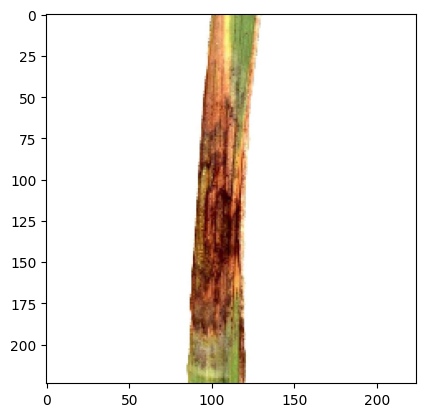

In [ ]:
image, label = next(iter(train_ds))
plt.imshow(image[0].numpy().astype("uint8"))

In [ ]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']


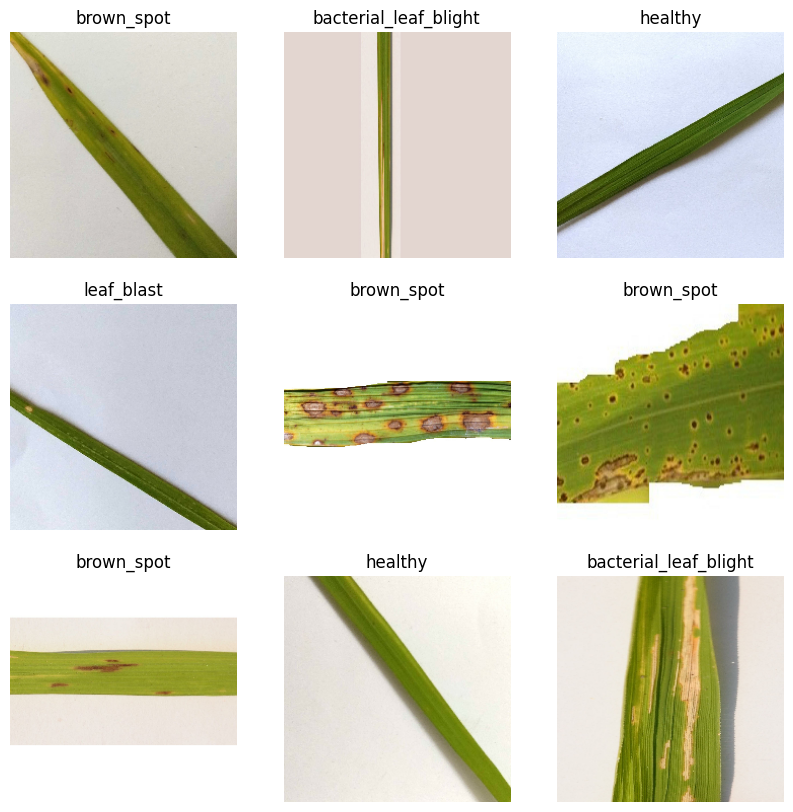

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    labels = np.argmax(labels, axis=1)  # Get the index of the maximum value in each label array
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
train_data = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = validation_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


### Data Augmented

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.Rescaling(1./255),
])

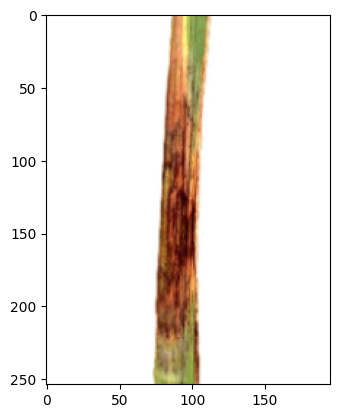

In [ ]:
result = data_augmentation(image[0])
_ = plt.imshow(result)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

## Model 

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
tf.random.set_seed(42)
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3), name = "input_shape", dtype=tf.float16)
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation='softmax', dtype=tf.float32,name='outputs')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, 3)           0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 outputs (Dense)             (None, 6)                 7686

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
initial_epochs = 25

loss0, accuracy0 = model.evaluate(test_data)

4/4 [==============================] - 7s 618ms/step - loss: 2.0553 - accuracy: 0.1524


In [ ]:
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=test_data)

Epoch 1/25
53/53 [==============================] - 60s 1s/step - loss: 1.8663 - accuracy: 0.2607 - val_loss: 1.5940 - val_accuracy: 0.3714
Epoch 2/25
53/53 [==============================] - 58s 1s/step - loss: 1.5159 - accuracy: 0.4173 - val_loss: 1.3704 - val_accuracy: 0.5048
Epoch 3/25
53/53 [==============================] - 55s 1s/step - loss: 1.3019 - accuracy: 0.4964 - val_loss: 1.2206 - val_accuracy: 0.5619
Epoch 4/25
53/53 [==============================] - 57s 1s/step - loss: 1.1628 - accuracy: 0.5690 - val_loss: 1.1134 - val_accuracy: 0.5905
Epoch 5/25
53/53 [==============================] - 57s 1s/step - loss: 1.0687 - accuracy: 0.6113 - val_loss: 1.0278 - val_accuracy: 0.6286
Epoch 6/25
53/53 [==============================] - 57s 1s/step - loss: 0.9787 - accuracy: 0.6250 - val_loss: 0.9597 - val_accuracy: 0.6571
Epoch 7/25
53/53 [==============================] - 57s 1s/step - loss: 0.9055 - accuracy: 0.6792 - val_loss: 0.9071 - val_accuracy: 0.6762
Epoch 8/25
53/53 [==

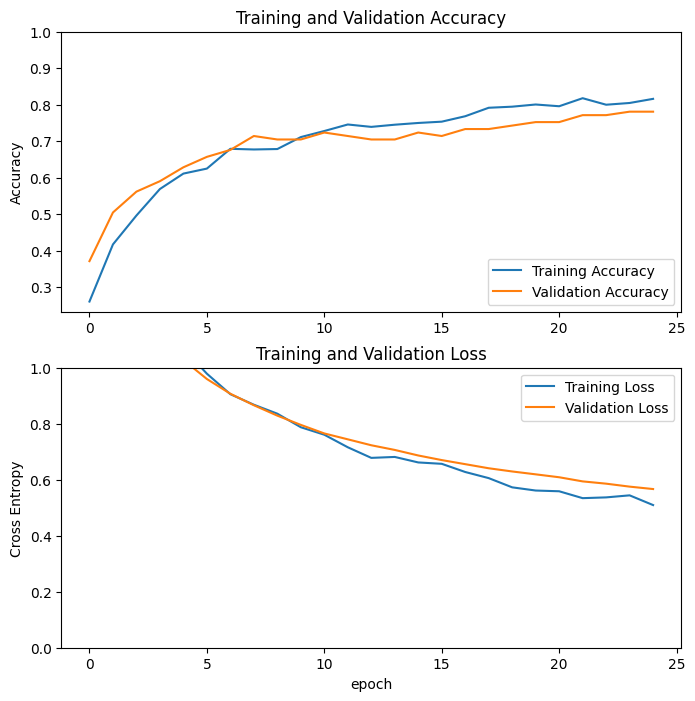

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()